In [30]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import os

PARQA = os.getenv('PARQA')


here I collect all DPR inventory
main target is to: 
- geolocate
- get park District for each property

In [15]:
#playgrounds
pgs = pd.read_csv(PARQA + 'data/DPR_property/playgrounds.csv', encoding='utf8')
pgs.head(2)

,Unnamed: 0,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,School_ID,Status,lat,lon
0,0,N,NaN,NaN,"Noble, Franklin, Milton Sts",American Playground,B001,B001,NaN,NaN,40.7288,-73.9579
1,1,Y,N,4,BAY PKWY nd CROPSEY AVENUE,Bensonhurst Park,B007-01,B007,NaN,NaN,40.5969,-73.9998


In [16]:
#golf courts
golf = pd.read_csv(PARQA + 'data/DPR_property/golf_courses.csv', encoding='utf8')
golf.head(2)

,SYSTEM,GISPROPNUM,BOROUGH,NAME,NYS_ASSEMB,NYS_SENATE,US_CONGRES,SHAPE_STAr,SHAPE_STLe
0,Q010-GLF0002,Q010,Q,Clearview Golf Course,26,11,3,5161648.013930,10086.167188
1,Q099-GLF0004,Q099,Q,Putt-Putt Golf Course,"35, 27",13,14,541943.487778,4311.121593


In [17]:
# public school playgrounds
ps = pd.read_csv(PARQA + 'data/DPR_property/school_playgrounds.csv', encoding='utf8')
ps.head(2)

,Unnamed: 0,BOROUGH,LOCATION,PSID,GISPROPNUM,geometry
0,0,Q,Francis Lewis Blvd. bet.ween 192 St. and 35 Ave.,I.S. 25,QS09,POINT (1042613.794511419 218061.6635471151)
1,1,Q,117 St. bet.ween Jamaica Ave. and 89 Ave.,P.S. 51,QS10,POINT (1030957.162983587 193668.7315153886)


In [18]:
# pools
pools = pd.read_csv(PARQA + 'data/DPR_property/pools.csv', encoding='utf8')
pools.head(2)

,Unnamed: 0,Accessible,Location,Name,Phone,Pools_Type,Prop_ID,Setting,Size,lat,lon,rec_center_id
0,0,Y,170th Street and Clay Avenue,Claremont Pool,(718) 901-4792,Intermediate,X008,Outdoor,75' x 60' x 3.5',40.8390,-73.9073,NaN
1,1,Y,173rd Street and Fulton Avenue,Crotona Pool,(718) 731-6872,Olympic,X010,Outdoor,330' x 120' x 4',40.8399,-73.8981,NaN


In [19]:
# recr_centers
recr = pd.read_csv(PARQA + 'data/DPR_property/recr_centers.csv', encoding='utf8')
recr.head(2)

,Unnamed: 0,ADDRESS,BOROUGH,CENTER_MANAGER,CITY,DEPUTY_MANAGER,FAX,NAME,PHONE,PHONE_B,STATE,ZIP,cost_description,cost_free,description,message
0,0,Livonia Ave between Hopkinson & Amboy streets,NaN,NaN,Brooklyn,NaN,NaN,Betsy Head Field House,(718) 257-1636,NaN,NY,11212,NaN,0,NaN,NaN
1,1,776 Lorimer Street,NaN,Seamus Moloney,Brooklyn,"Jeff Cooper, Tom Beaver",(718) 218-2390,McCarren Play Center,(718) 218-2380,NaN,NY,11222,NaN,0,"<p class=""alert alert-success"">Did you know ma...",NaN


In [20]:
# beaches - geolocated
beaches = pd.read_csv(PARQA + 'data/DPR_property/beaches.csv', encoding='utf8')
beaches.head(2)

,Unnamed: 0,Accessible,Accessible_Notes,Barbecue_Allowed,Bathroom,Bicycle_and_Skate_Path,Boardwalk,Concession_Stand,Description,Directions,Location,Mobile_Charging_Stations,Name,Note,Performance_Pavilion,Phone,Prop_ID,Surf,lat,lon
0,0,Y,"<a href=""/accessibility/beach-trail"">Beach mat...",Yes (North and South Picnic Areas),Yes,NaN,NaN,Havana Cafe provides food at three snack bars ...,"<p>Orchard Beach, Bronx's sole public beach, w...","<h5>Directions</h5><p><a href=""http://maps.goo...",On Long Island Sound in Pelham Bay Park,Yes,Orchard Beach and Promenade,NaN,NaN,(718) 885-2275,X039,NaN,40.8664,-73.7938
1,1,Y,"<a href=""/accessibility/beach-trail"">Beach mat...","Yes (Northeast of promenade, median adjacent t...",Yes,Yes (only permitted from 5:00 a.m.-10:00 a.m.),Yes (promenade),Yes,"<p>This small, family-friendly beach east of B...","<h5>Directions</h5><p><a href=""http://maps.goo...","On Atlantic Ocean, Oriental Blvd., from Ocean ...",NaN,Manhattan Beach,NaN,NaN,(718) 946-1373,B251,NaN,40.5764,-73.9441


In [25]:
# parks
parks = pd.read_csv(PARQA + 'data/DPR_property/parks.csv', encoding='utf8')
parks.head(2)

,Unnamed: 0,BOROUGH,GISPROPNUM,LOCATION,NYS_ASSEMB,NYS_SENATE,Park_District,SHAPE_STAr,SHAPE_STLe,SIGNNAME,TYPECATEGO,US_CONGRES,WATERFRONT,geometry,id,park_area
0,0,Q,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Q-01,903579.125015,7376.271660,Queensbridge Park,Community Park,12,Yes,POINT (998605.1065955567 214637.5474135593),0,903579.125068
1,1,X,X253,City Island Ave bet. Centre St. and Winter St.,82,34,X-10,263831.264191,2635.610175,Ambrosini Field,Recreation Field/Courts,14,Yes,POINT (1044180.735226439 247025.9500432702),1,263831.264211





## DISTRICTS

In [28]:
districts = gp.read_file(PARQA + 'data/park_Districts_computed.geojson')

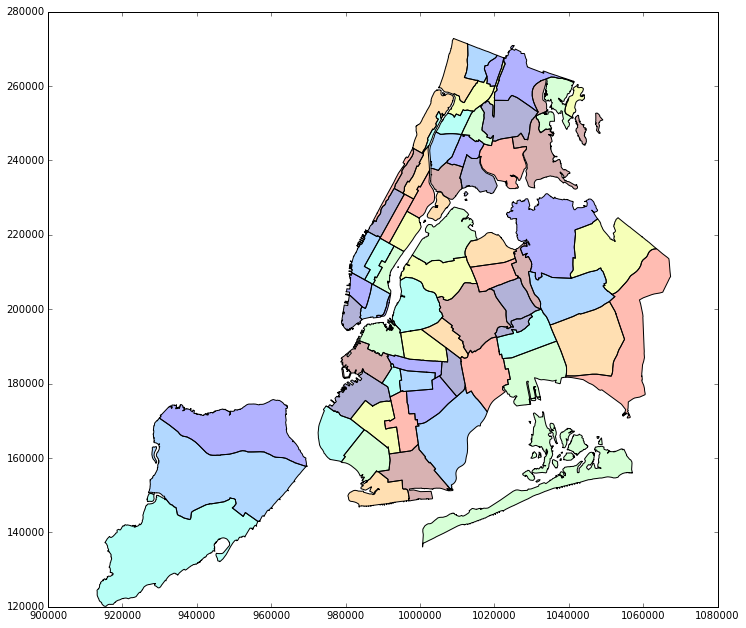

In [36]:
districts.plot(figsize=(12,12), alpha=.3);